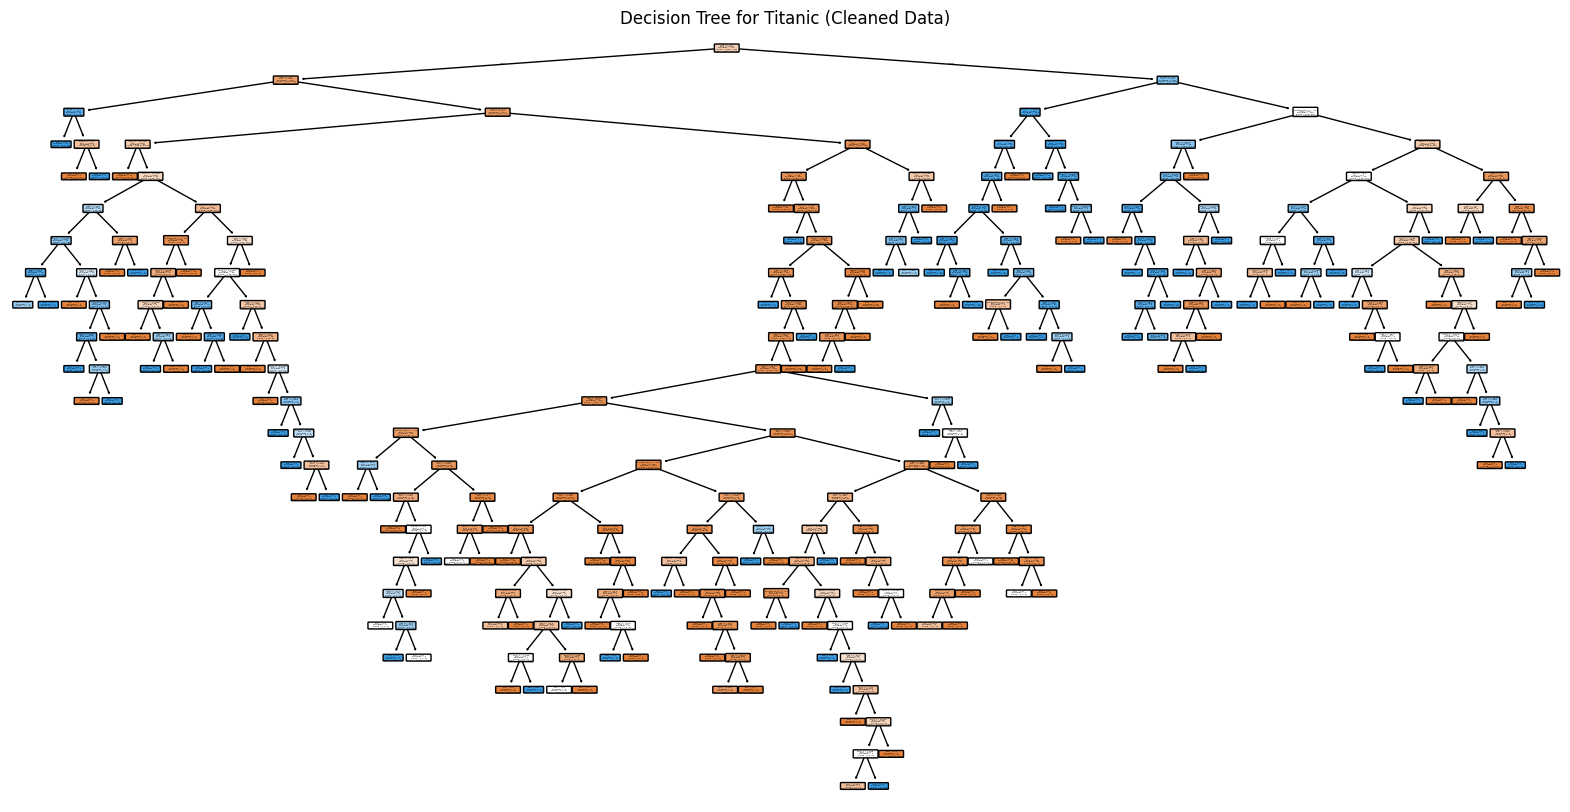

Accuracy: 0.8212
Confusion Matrix:
 [[97 13]
 [19 50]]

Classification Report:
               precision    recall  f1-score   support

Not Survived       0.84      0.88      0.86       110
    Survived       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 1. Load cleaned dataset
# Ensure 'train_cleaned.csv' is in the working directory
titanic = pd.read_csv('train.csv')

# 2. Features and target
# The cleaned file includes encoded columns: Embarked_C, Embarked_Q, Embarked_S
target = 'Survived'
features = [col for col in titanic.columns if col != target]
X = titanic[features]
y = titanic[target]

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# 5. Visualize Decision Tree
plt.figure(figsize=(20,10))
plot_tree(
    dt,
    feature_names=features,
    class_names=['Not Survived','Survived'],
    filled=True,
    rounded=True
)
plt.title('Decision Tree for Titanic (Cleaned Data)')
plt.show()

# 6. Evaluate the model
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Not Survived','Survived'])

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_mat)
print("\nClassification Report:\n", report)